In [22]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [27]:
# Load Yolo
net = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3.cfg")
classes = []
with open("/content/coco.names", "r") as f:
  classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers_indexes = [int(index) for index in net.getUnconnectedOutLayers()]

In [28]:
print(output_layers_indexes)

[200, 227, 254]


In [29]:
# Get the names of the output layers
output_layers = [layer_names[index - 1] for index in output_layers_indexes]

In [36]:
#Load Image
img = cv2.imread("/content/tokyo-people-traveling-street_23-2149297333.jpg")
# Resize the image
scale_percent = 150  # Percentage of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

In [31]:
# Detecting Objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [38]:
# Showing information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        print("Detected Object:", label, "Confidence:", confidence)

        # Draw bounding box and label
        color = (0, 255, 0)  # Green color for bounding box
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, f"{label}: {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


Detected Object: person Confidence: 0.5101518630981445
Detected Object: bus Confidence: 0.9676567912101746
Detected Object: bus Confidence: 0.6040551662445068
Detected Object: car Confidence: 0.6260829567909241
Detected Object: traffic light Confidence: 0.5102105140686035
Detected Object: car Confidence: 0.6285709738731384
Detected Object: car Confidence: 0.6107102036476135
Detected Object: person Confidence: 0.5507174134254456
Detected Object: person Confidence: 0.5289691090583801
Detected Object: person Confidence: 0.6294559836387634
Detected Object: person Confidence: 0.6025136113166809
Detected Object: person Confidence: 0.5665228962898254
Detected Object: person Confidence: 0.6125431060791016
Detected Object: person Confidence: 0.5283750295639038


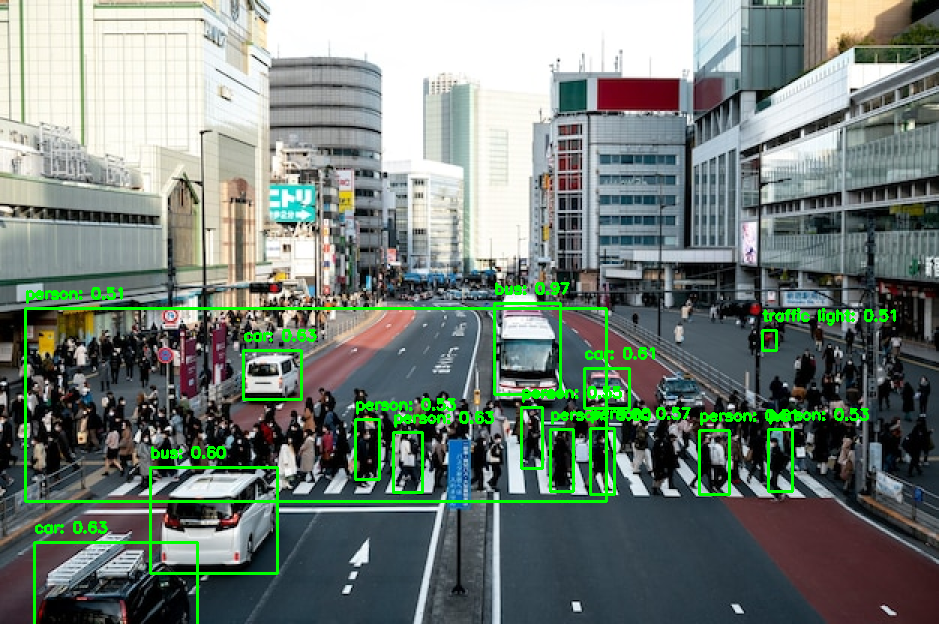

In [39]:
# Show the image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()